In [1]:
# загрузим библиотеки для чтения данных

import pandas as pd
import numpy as np
import os

In [2]:
!ls ../data/factor_based

test_additional_data.csv  train_additional_data.csv
test_main_data.csv	  train_main_data.csv


In [3]:
# считаем данные в соответствующие датафреймы
FLD = "/home/nur/projects/analysis/dynamic_price/data/factor_based"
train_main_df = pd.read_csv(os.path.join(FLD, 'train_main_data.csv'))
train_additional_df = pd.read_csv(os.path.join(FLD, 'train_additional_data.csv'))

In [4]:
test_main_df = pd.read_csv(os.path.join(FLD, 'test_main_data.csv'))
test_additional_df = pd.read_csv(os.path.join(FLD, 'test_additional_data.csv'))

In [5]:
print(train_main_df.shape)
train_main_df.head(2)

(29000, 13)


id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0  81237  2014-09-23       50     28.0   11.0       12.0       1.0   
1  96765  2014-07-31       42     28.0    1.0        5.0       2.0   

   build_year  num_room  kitch_sq  apartment condition  sub_area      price  
0      1984.0       2.0       8.0                  NaN        77  8908240.0  
1      1961.0       2.0       6.0                  2.0        15  4616088.0

In [6]:
print(train_additional_df.shape)
train_additional_df.head(2)

(29000, 19)


id  population  indust_part  preschool_facilities  school_facilities  \
0  81237       78616     0.093443                     6                  8   
1  96765      125354     0.265089                     4                  5   

   hospital_beds_raion  healthcare_facilities  university_num  \
0               3300.0                      2               1   
1               1937.0                      3               0   

   sport_objects_facilities  additional_education_facilities  \
0                        11                                1   
1                         6                                4   

   culture_objects_facilities  shopping_centers_facilities  office_num  \
0                           0                            4           5   
1                           0                            2           0   

   green_part  prom_part  cafe_count  church_facilities  mosque  \
0       16.06       2.68           2                  0       1   
1        3.24       0.00           2                  0       0   

   leisure_facilities  
0                   0  
1                   0

Рекомендуемые этапы анализа данных
- EDA
- Подготовка данных
- Моделирование
- Пост анализ

# EDA: Exploratory data analysis

In [7]:
# конвертируем колонку в datetime

train_main_df['timestamp'] = pd.to_datetime(train_main_df['timestamp'])

In [8]:
# посмотрим на колонки, информацию о пустых значениях и типах данных
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   29000 non-null  int64         
 1   timestamp            29000 non-null  datetime64[ns]
 2   full_sq              29000 non-null  int64         
 3   life_sq              22924 non-null  float64       
 4   floor                28839 non-null  float64       
 5   max_floor            19881 non-null  float64       
 6   material             19881 non-null  float64       
 7   build_year           16051 non-null  float64       
 8   num_room             19881 non-null  float64       
 9   kitch_sq             19881 non-null  float64       
 10  apartment condition  16096 non-null  float64       
 11  sub_area             29000 non-null  int64         
 12  price                29000 non-null  float64       
dtypes: datetime64[ns](1), float64(9

In [9]:
# теперь - сводные статистики по числовым переменным

train_main_df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  29000.000000  29000.000000  22924.000000  28839.000000  19881.000000   
mean   55032.038069     54.228000     34.418644      7.674954     12.536744   
std    25909.100401     38.553717     53.387672      5.319167      6.767270   
min    10017.000000      0.000000      0.000000      0.000000      0.000000   
25%    32786.750000     38.000000     20.000000      3.000000      9.000000   
50%    55005.000000     49.000000     30.000000      7.000000     12.000000   
75%    77421.250000     63.000000     43.000000     11.000000     17.000000   
max    99993.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq  \
count  19881.000000  1.605100e+04  19881.000000  19881.000000   
mean       1.825210  3.127933e+03      1.910920      6.415070   
std        1.478001  1.582588e+05      0.853365     28.953382   
min        1.000000  0.000000e+00      0.000000      0.000000   
25%        1.000000  1.966000e+03      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000   

       apartment condition      sub_area         price  
count         16096.000000  29000.000000  2.900000e+04  
mean              2.106921     76.503172  5.772016e+06  
std               0.882152     39.199563  3.867065e+06  
min               1.000000      0.000000  8.098400e+04  
25%               1.000000     45.000000  3.838643e+06  
50%               2.000000     77.000000  5.088820e+06  
75%               3.000000    105.000000  6.721672e+06  
max              33.000000    145.000000  8.998222e+07

In [10]:
# импортируем библиотеки для визуализаци данных

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

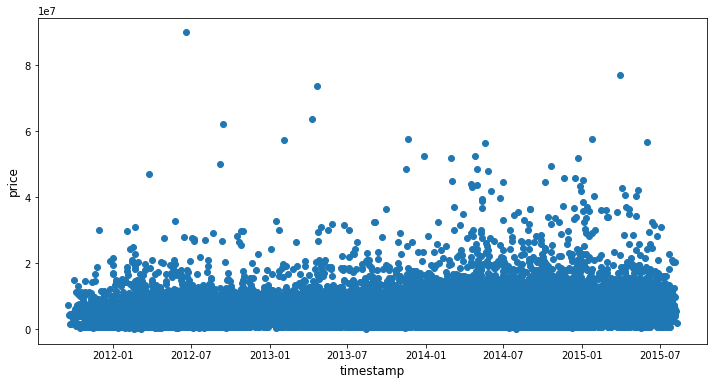

In [11]:
# нарисуем график зависимости цены от даты

plt.figure(figsize=(12, 6))
plt.scatter(train_main_df.timestamp, train_main_df.price)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

/home/nur/projects/analysis/env/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


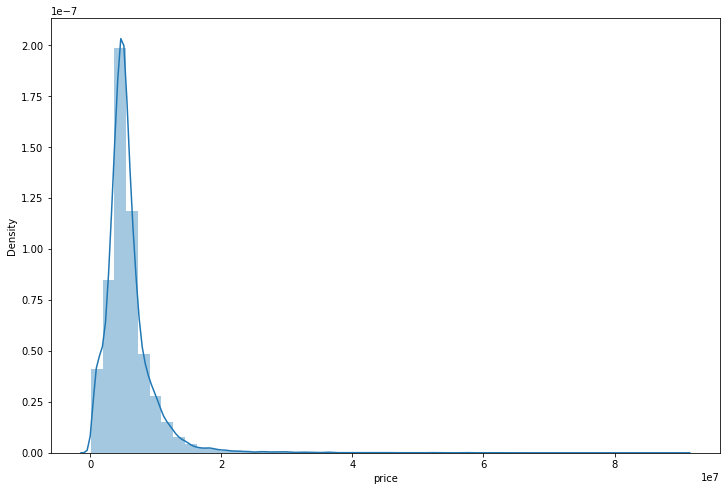

In [12]:
# нарисуем распределение цены

plt.figure(figsize=(12, 8))
sns.distplot(train_main_df.price.values, bins=50, kde=True)
plt.xlabel('price')
plt.show()

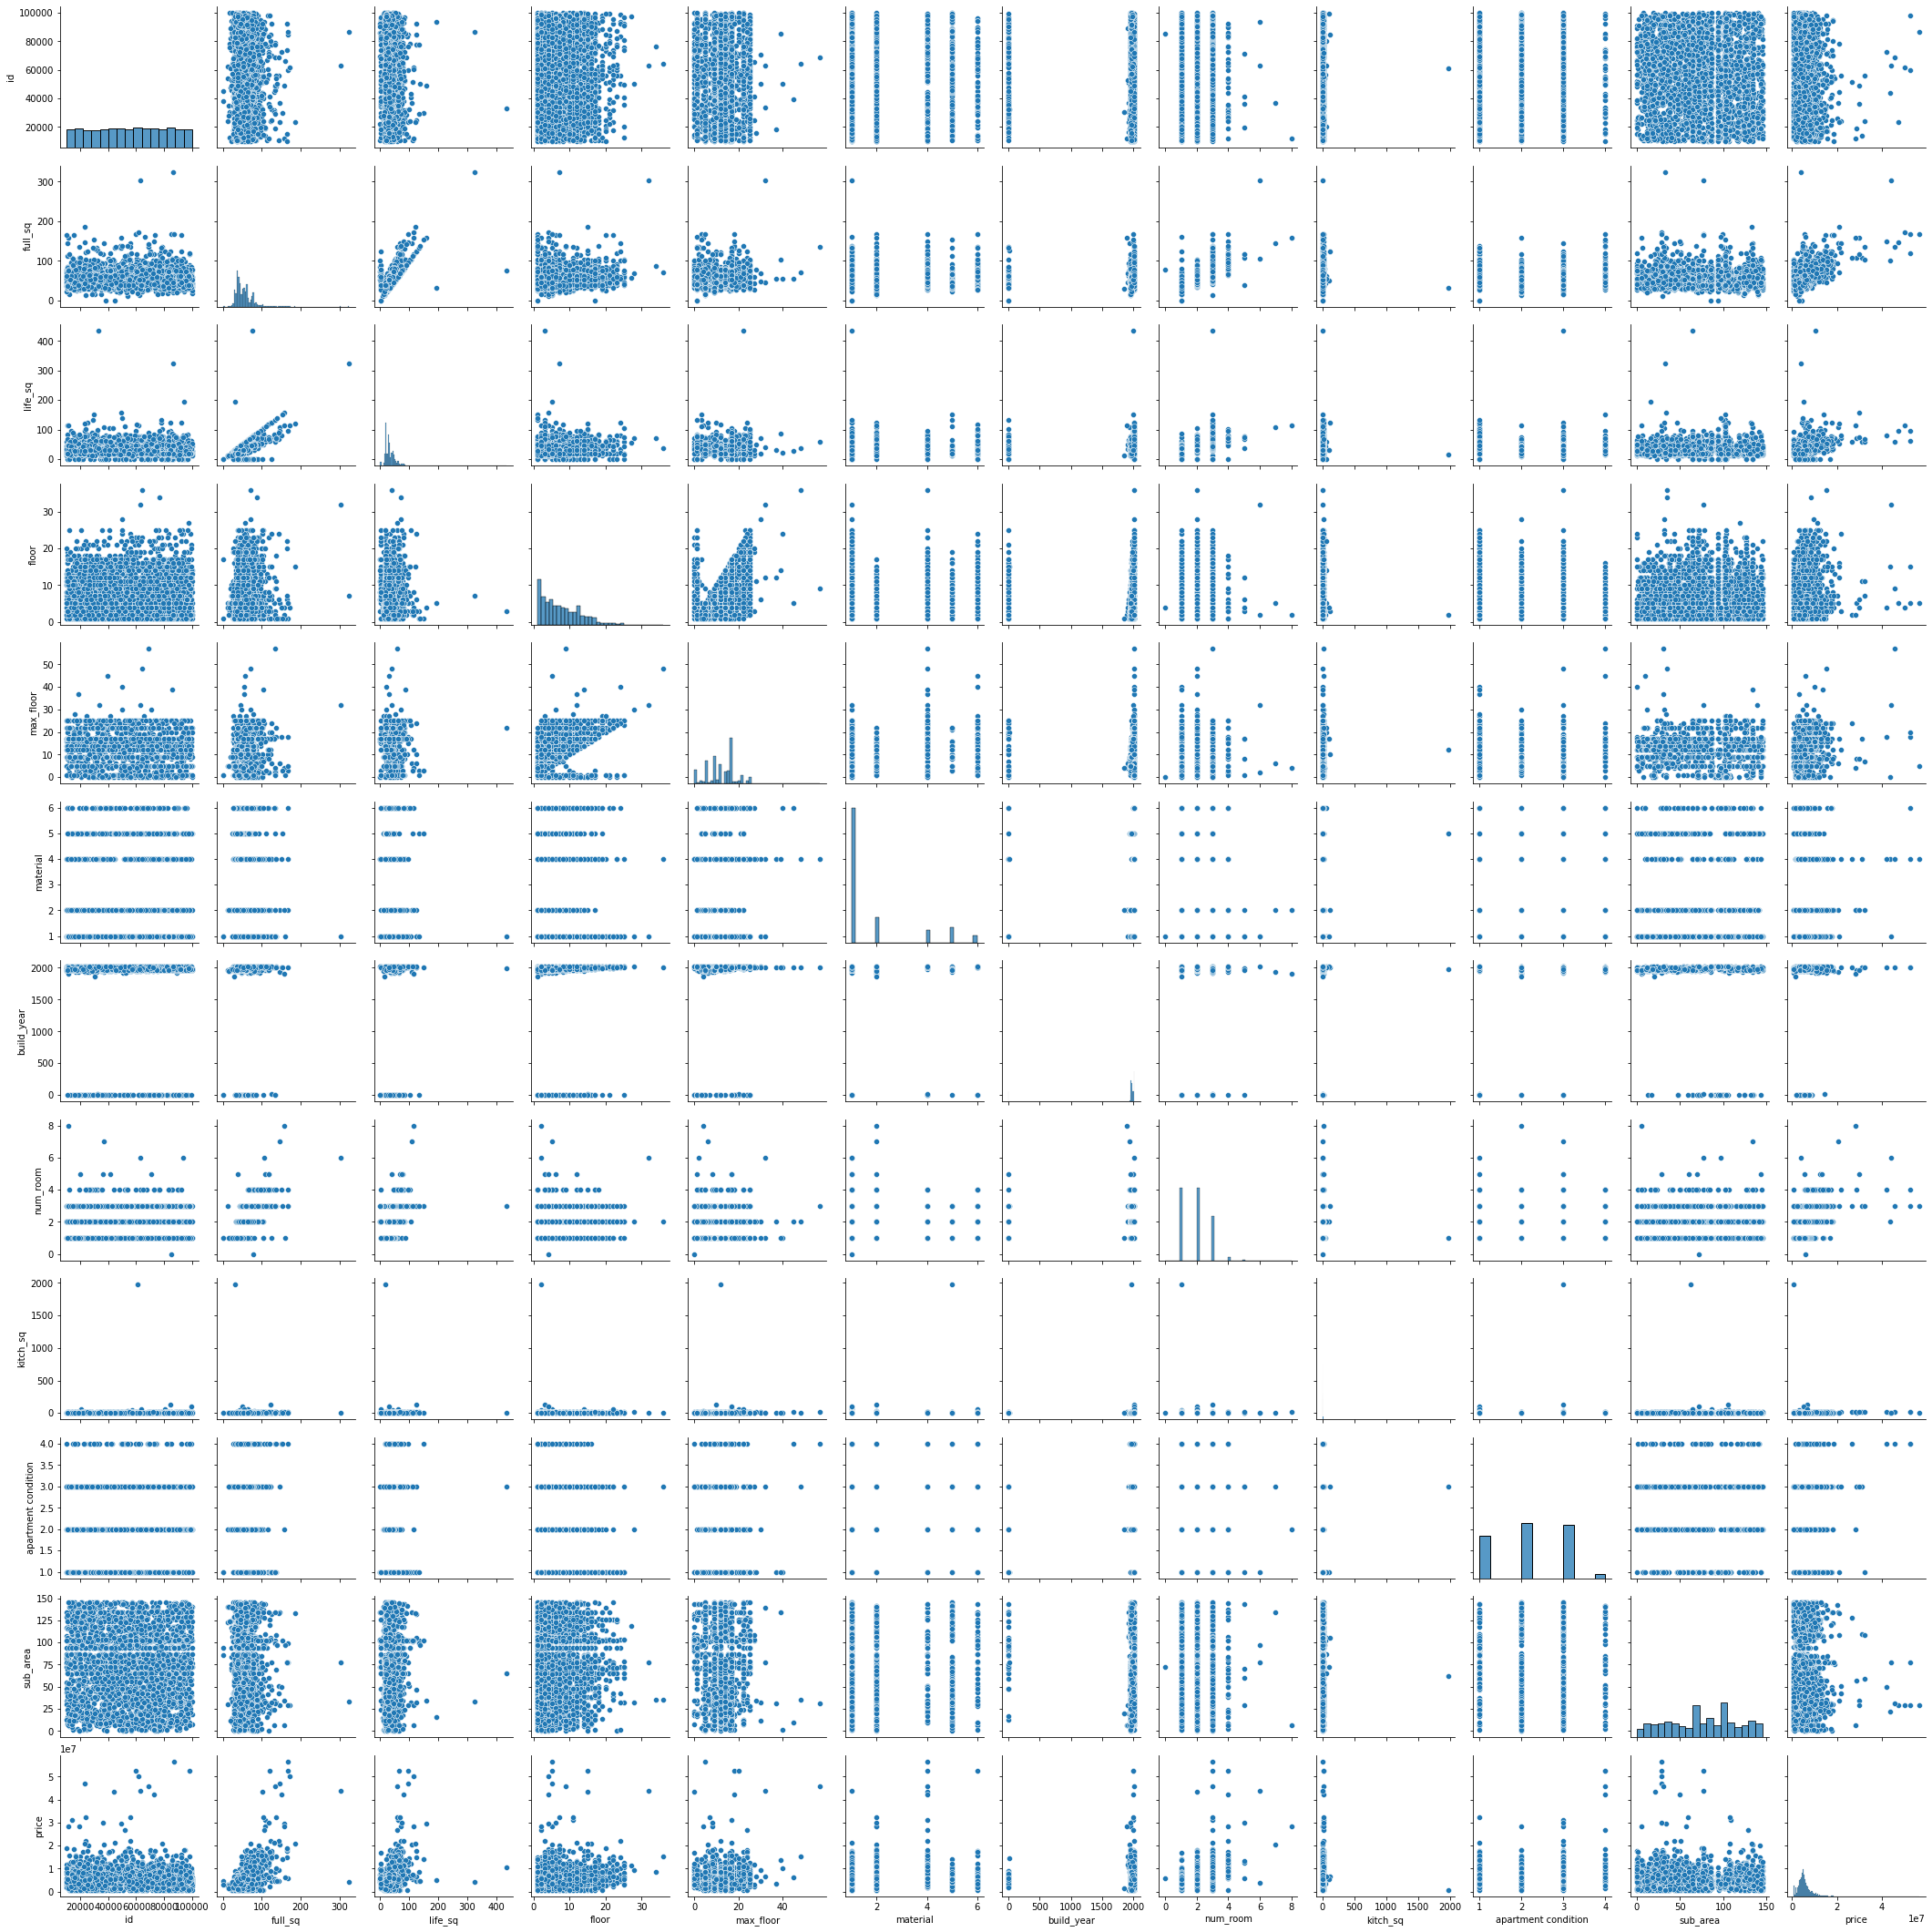

In [13]:
# посмотрим на попарные графики 
# в нижнем ряду все относящиеся к цене (price)

sns.pairplot(train_main_df.sample(3000))

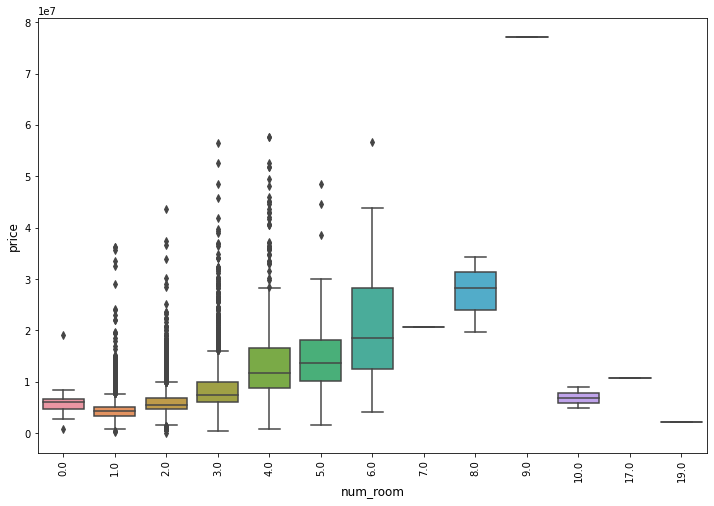

In [14]:
# нарисуем боксплоты для цены по количеству комант в квартире
# медиана цены растет в зависимости от количества комнат
# в данных явно проблемы: квартира с 0 комнат, дешевые квартиры с большим количеством комнат

plt.figure(figsize=(12, 8))
sns.boxplot(x='num_room', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('num_room', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

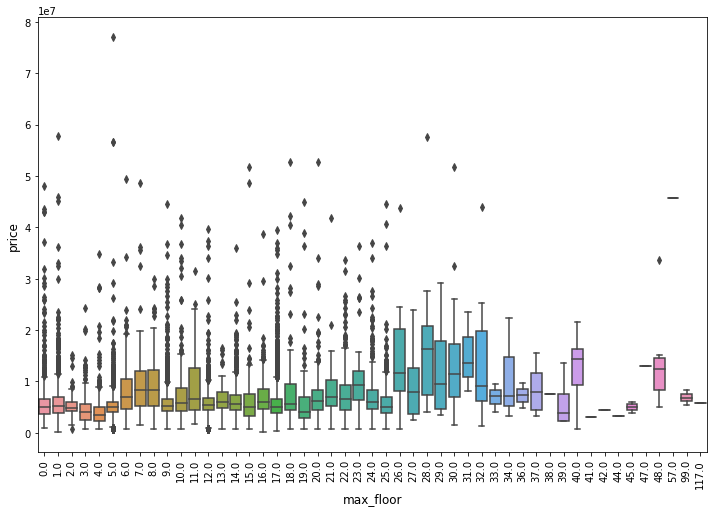

In [15]:
# боксплот цены от количества этажей в доме
# условно можно разделить на группы: до 5 этажа включительно - дешевые пятиэтажки, от 6 до 25 этажа, от 26 до 32 этажа
# выброс для 4-этажного здания - максимальная цена

plt.figure(figsize=(12,8))
sns.boxplot(x='max_floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('max_floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

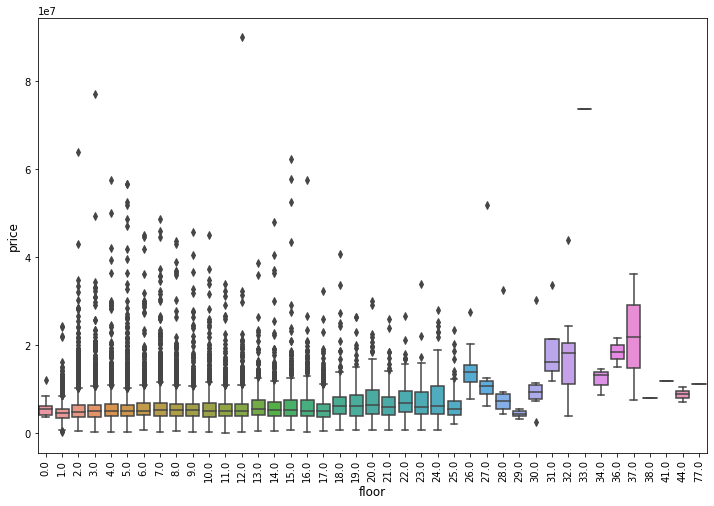

In [16]:
# зависимости цены от этажа квартиры
# медианное изменение не такое большое
# надо внимательно посмотреть на выброс на 12 этаже

plt.figure(figsize=(12,8))
sns.boxplot(x='floor', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

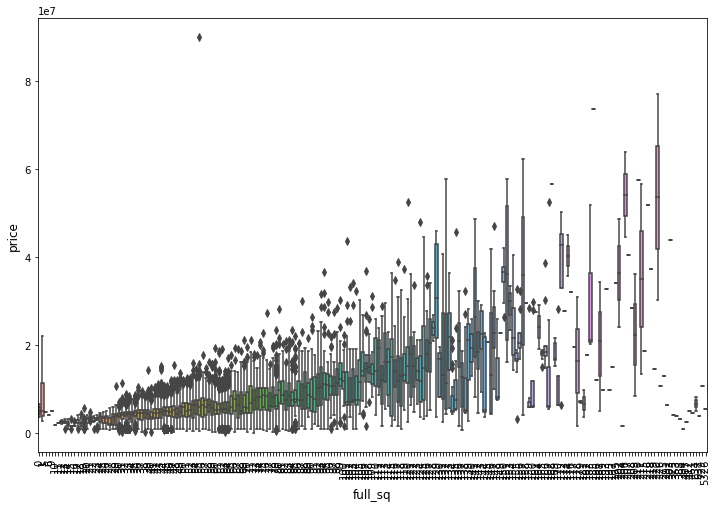

In [17]:
# зависимость цены от общей площади
# виден разлет значений

plt.figure(figsize=(12,8))
sns.boxplot(x='full_sq', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

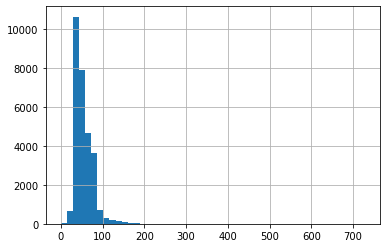

In [18]:
# посмотрим на распределение площади до 1000
# много значений до 100, далее - длинный хвост

train_main_df[train_main_df.full_sq < 1000].full_sq.hist(bins=50)

In [19]:
# бинаризуем данные по площади
# длинный хвост пойдет в последний бин

bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, 200, 5326]
train_main_df['full_sq_bins'] = np.searchsorted(bins, train_main_df.full_sq.values)

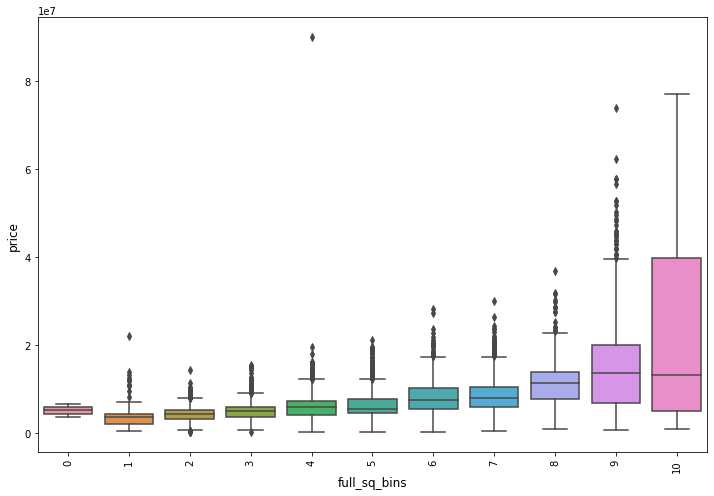

In [20]:
# построим зависимость цены по категориям, полученным на предыдущем шаге
# выбросы в 4 и 9 бине - желательно посмотреть отдельно

plt.figure(figsize=(12, 8))
sns.boxplot(x='full_sq_bins', y='price', data=train_main_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('full_sq_bins', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
train_additional_df.shape

(29000, 19)

In [22]:
# добавим дополнительные данные

whole_train_df = train_main_df.merge(train_additional_df, how='left', on='id')

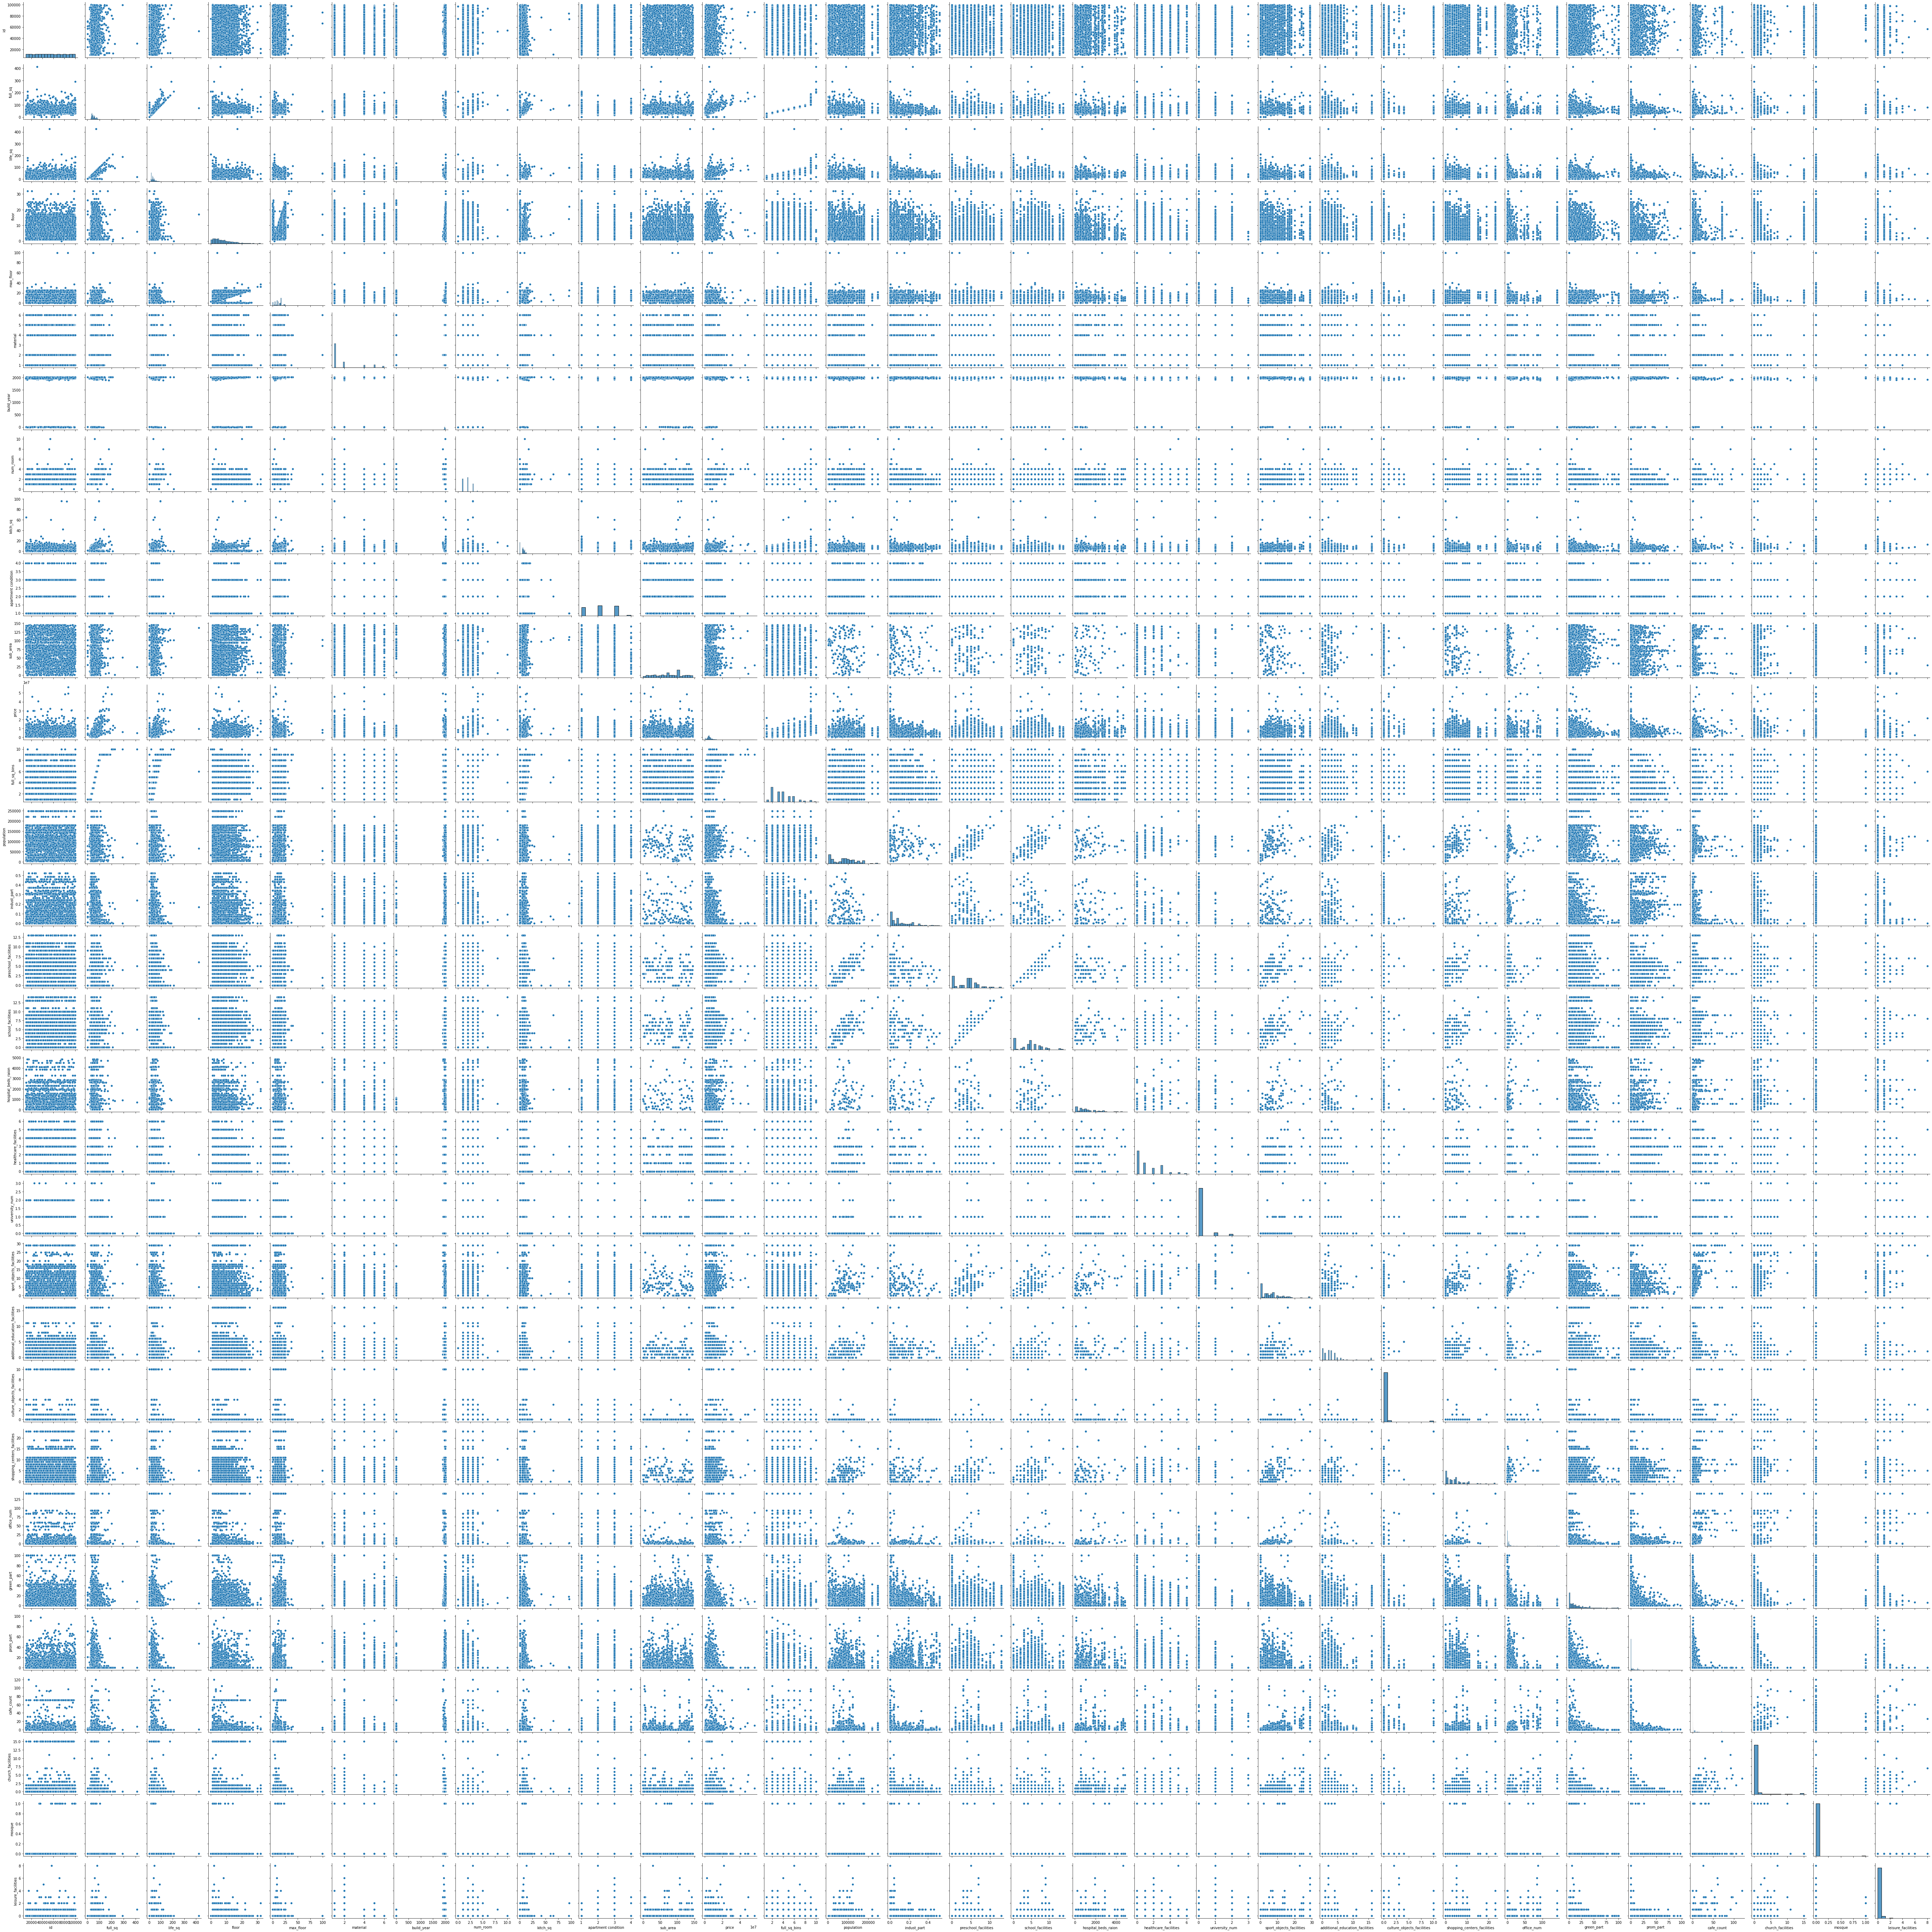

In [23]:
# снова посмтроим попарные графики, обратим внимание на новые для цены
# колонки на графиках - дискретные значения

sns.pairplot(whole_train_df.sample(3500))

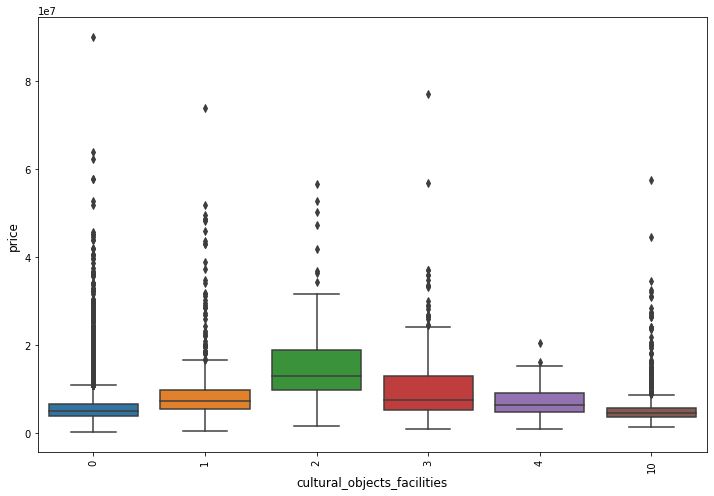

In [24]:
# посмотрим на зависимость цены от количества окружающих культурных объектов
# возможно, стоит посмотреть на записи с culture_objects_facilities == 10

plt.figure(figsize=(12, 8))
sns.boxplot(x='culture_objects_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('cultural_objects_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

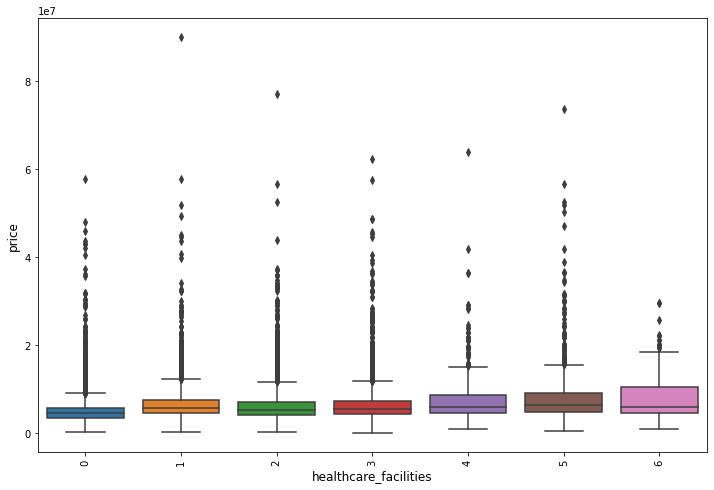

In [25]:
# зависимость цены от количества объектов здравоохранения
# медиана практически не изменяется

plt.figure(figsize=(12, 8))
sns.boxplot(x='healthcare_facilities', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('healthcare_facilities', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

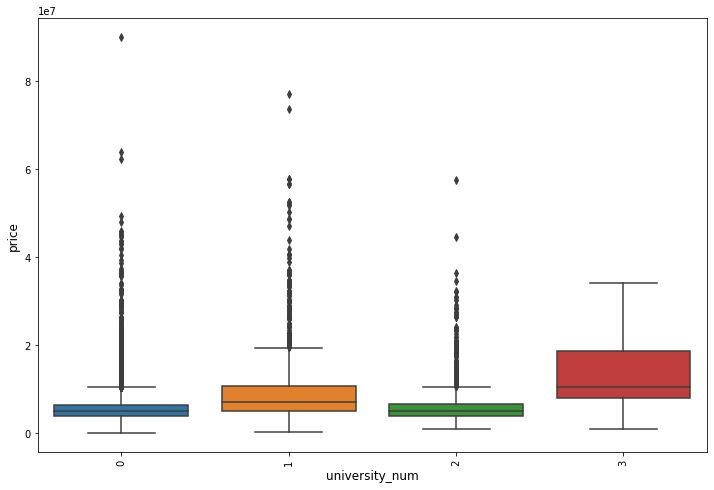

In [26]:
# зависимость цены от количества университетов рядом
# дороже квартиры, где рядом 1 или 3 университета

plt.figure(figsize=(12, 8))
sns.boxplot(x='university_num', y='price', data=whole_train_df)
plt.ylabel('price', fontsize=12)
plt.xlabel('university_num', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

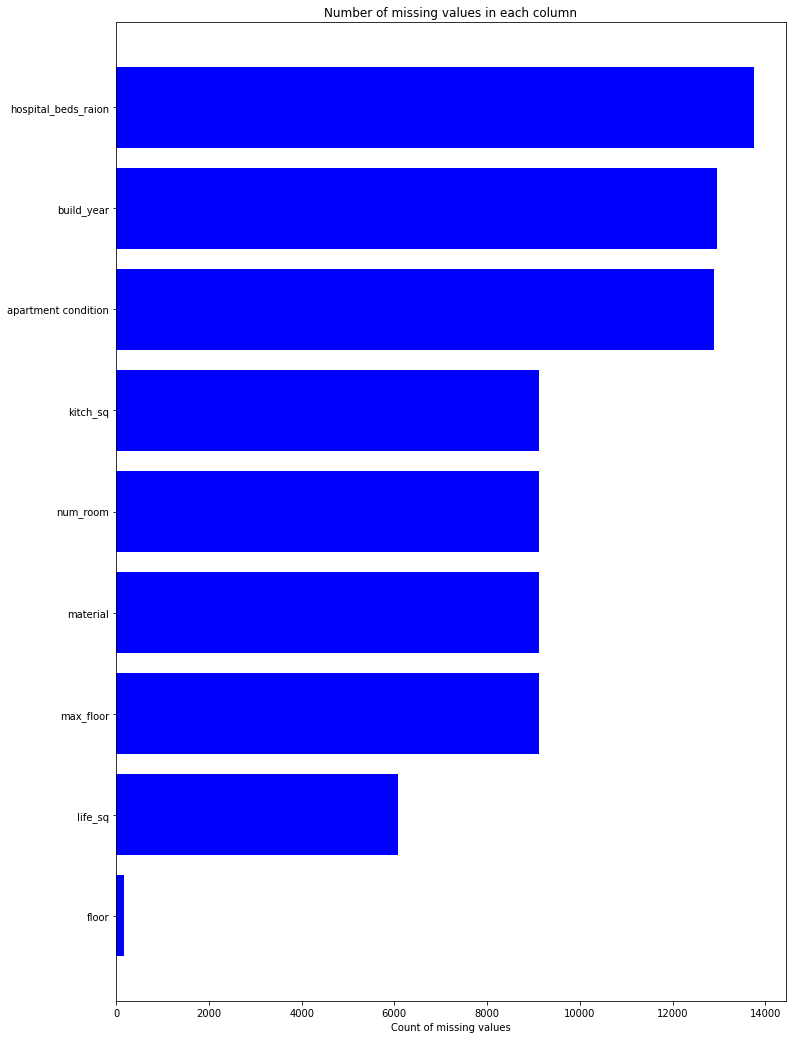

In [27]:
# посмотрим на количество пропусков в данных

missing_df = whole_train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df['missing_count'], color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## Regression metrics

In [28]:
from IPython.display import display, Math, Latex
display(Math(r'MSE = \frac1N \sum ^{N}_{i=1} (y_i-\hat y_i)^2 '))


<IPython.core.display.Math object>

In [29]:
display(Math(r'RMSE = \sqrt{\frac1N \sum ^{N}_{i=1} (y_i-\hat y_i)^2 } = \sqrt {MSE}'))

<IPython.core.display.Math object>

In [30]:
display(Math(r'MАE = \frac1N \sum ^{N}_{i=1} |y_i-\hat y_i|'))

<IPython.core.display.Math object>

In [31]:
# Коэффициент детерминации
display(Math(r'R^2 = 1 - \frac{MSE(model)}{MSE(ocm)} '))

<IPython.core.display.Math object>

In [32]:
display(Math(r'MAPE = \frac{100%}{N}  \sum ^{N}_{i=1} |\frac{y_i-\hat y_i}{y_i}| '))

<IPython.core.display.Math object>

In [33]:
display(Math(r'RMSLE = \sqrt{MSE(log(y_i+1),log(\hat y_i +1))}'))

<IPython.core.display.Math object>

# Data preparation

In [34]:
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   29000 non-null  int64         
 1   timestamp            29000 non-null  datetime64[ns]
 2   full_sq              29000 non-null  int64         
 3   life_sq              22924 non-null  float64       
 4   floor                28839 non-null  float64       
 5   max_floor            19881 non-null  float64       
 6   material             19881 non-null  float64       
 7   build_year           16051 non-null  float64       
 8   num_room             19881 non-null  float64       
 9   kitch_sq             19881 non-null  float64       
 10  apartment condition  16096 non-null  float64       
 11  sub_area             29000 non-null  int64         
 12  price                29000 non-null  float64       
 13  full_sq_bins         29000 non-

In [49]:
whole_train_df.head(2)

id  timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0  81237 2014-09-23       50     28.0   11.0       12.0       1.0      1984.0   
1  96765 2014-07-31       42     28.0    1.0        5.0       2.0      1961.0   

   num_room  kitch_sq  ...  year  month  week_of_year  day_of_week  \
0       2.0       8.0  ...  2014      9            39            1   
1       2.0       6.0  ...  2014      7            31            3   

         timestamp_int  year_month  ratio_life_dash_full_sq  \
0  1411430400000000000      2014_9                 0.560000   
1  1406764800000000000      2014_7                 0.666667   

   ration_kitchen_dash_full_sq   age  some_extra_sqr  
0                     0.160000 -30.0            22.0  
1                     0.142857 -53.0            14.0  

[2 rows x 42 columns]

In [36]:
# добавим дополнительные столбцы на основе имеющейся даты

# get year
whole_train_df['year'] = whole_train_df.timestamp.dt.year

# get month of year
whole_train_df['month'] = whole_train_df.timestamp.dt.month

# get day of week
whole_train_df['week_of_year'] = whole_train_df.timestamp.dt.weekofyear

# get week of the year
whole_train_df['day_of_week'] = whole_train_df.timestamp.dt.weekday

whole_train_df['timestamp_int'] = whole_train_df.timestamp.astype(int)

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [37]:
# создадим столбец для месяца года

whole_train_df['year_month'] = whole_train_df['year'].astype(str) + '_' + whole_train_df['month'].astype(str)

In [38]:
# заполним все пропуски константой
# вы можете выбрать более подходящий вариант

whole_train_df.fillna(-99, inplace=True)

In [51]:
# вспомним, что цена сильно зависит от площади квартиры, на основе этих данных
# добавим столбцы для отношения площадей
sigma = 1e-8
whole_train_df["ratio_life_dash_full_sq"] = whole_train_df["life_sq"] / (whole_train_df["full_sq"] + sigma)
whole_train_df["ration_kitchen_dash_full_sq"] = whole_train_df["kitch_sq"] / (whole_train_df["full_sq"] + sigma)

# добавим воздраст здания
whole_train_df['age'] = whole_train_df["build_year"] - whole_train_df['year']

# добавим разность между общей и жилой площадью квартиры
whole_train_df['some_extra_sqr'] = whole_train_df["full_sq"] - whole_train_df["life_sq"]

In [52]:
whole_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               29000 non-null  int64         
 1   timestamp                        29000 non-null  datetime64[ns]
 2   full_sq                          29000 non-null  int64         
 3   life_sq                          29000 non-null  float64       
 4   floor                            29000 non-null  float64       
 5   max_floor                        29000 non-null  float64       
 6   material                         29000 non-null  float64       
 7   build_year                       29000 non-null  float64       
 8   num_room                         29000 non-null  float64       
 9   kitch_sq                         29000 non-null  float64       
 10  apartment condition              29000 non-null  float64  

In [53]:
# в тестовом датафрейме преобразуем колонку к нужному типу

test_main_df.timestamp = pd.to_datetime(test_main_df.timestamp)

In [54]:
test_main_df.timestamp.describe()

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                    682
top       2014-06-14 00:00:00
freq                        5
first     2011-11-01 00:00:00
last      2015-07-21 00:00:00
Name: timestamp, dtype: object

In [55]:
whole_train_df.timestamp.describe()

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   29000
unique                   1416
top       2014-12-19 00:00:00
freq                       68
first     2011-09-18 00:00:00
last      2015-08-10 00:00:00
Name: timestamp, dtype: object

# Modeling

In [44]:
import xgboost as xgb

In [45]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [59]:
assert not any(whole_train_df.isnull().sum(axis=0).values)

In [60]:
# в валидационный датафрейм отправим данные после 2015-05-01, а учиться будем на более ранних данных

train_X = whole_train_df[whole_train_df.timestamp < pd.to_datetime('2015-05-01')]
train_y = whole_train_df[whole_train_df.timestamp < pd.to_datetime('2015-05-01')].price
val_X = whole_train_df.drop(['price','timestamp'], axis=1)[whole_train_df.timestamp >= pd.to_datetime('2015-05-01')]
val_y = whole_train_df[whole_train_df.timestamp >= pd.to_datetime('2015-05-01')].price

In [61]:
col_list = ['full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'apartment condition',
       'sub_area', 'full_sq_bins', 'population', 'indust_part',
       'preschool_facilities', 'school_facilities', 'hospital_beds_raion',
       'healthcare_facilities', 'university_num', 'sport_objects_facilities',
       'additional_education_facilities', 'culture_objects_facilities',
       'shopping_centers_facilities', 'office_num', 'green_part', 'prom_part',
       'cafe_count', 'church_facilities', 'mosque', 'leisure_facilities',
       'year', 'month', 'week_of_year', 'day_of_week', 'timestamp_int',
       'ratio_life_dash_full_sq', 'ration_kitchen_dash_full_sq',
       'age', 'some_extra_sqr']

In [62]:
# создадим данные для обучения и валидации

xgb_train = xgb.DMatrix(train_X[col_list], train_y, feature_names = col_list, enable_categorical=True)
xgb_test = xgb.DMatrix(val_X[col_list], val_y, feature_names = col_list, enable_categorical=True)

In [63]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [64]:
model = xgb.train(params = xgb_params,
                  dtrain = xgb_train, 
                  num_boost_round = 300, 
                  evals = evallist, 
                  early_stopping_rounds = 10, 
                  verbose_eval = 10)

[04:43:32] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:43:32] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:7474625.00000	train-rmse:6611727.00000
[10]	eval-rmse:5180100.50000	train-rmse:4470673.00000
[20]	eval-rmse:3931025.00000	train-rmse:3333894.00000
[30]	eval-rmse:3239538.00000	train-rmse:2757979.75000
[40]	eval-rmse:2887535.50000	train-rmse:2487020.75000
[50]	eval-rmse:2667920.50000	train-rmse:2341909.00000
[60]	eval-rmse:2530957.75000	train-rmse:2258068.25000
[70]	eval-rmse:2449492.75000	train-rmse:2202018.00000
[80]	eval-rmse:2395438.75000	train-rmse:2161305.25000
[90]	eval-rmse:2361720.75000	train-rmse:2132070.50000
[100]	eval-rms

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# теперь выберем для валидации случайные записи, а не деление по времени

X_train, X_test, y_train, y_test = train_test_split(
    whole_train_df[col_list],
    whole_train_df.price, test_size=1425, random_state=42)

In [67]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [68]:
xgb_train = xgb.DMatrix(X_train, y_train, feature_names = col_list, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, feature_names = col_list, enable_categorical=True)

In [69]:
evallist = [(xgb_test, 'eval'), (xgb_train, 'train')]

In [70]:
model_2 = xgb.train(params = xgb_params, 
                    dtrain = xgb_train, 
                    num_boost_round = 300, 
                    evals = evallist, 
                    early_stopping_rounds = 10, 
                    verbose_eval = 10)

[04:44:16] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[04:44:16] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-rmse:7186670.00000	train-rmse:6627779.00000
[10]	eval-rmse:5038354.50000	train-rmse:4475689.00000
[20]	eval-rmse:3896743.75000	train-rmse:3338261.75000
[30]	eval-rmse:3315883.50000	train-rmse:2765541.00000
[40]	eval-rmse:3007126.75000	train-rmse:2480388.25000
[50]	eval-rmse:2844020.00000	train-rmse:2327967.75000
[60]	eval-rmse:2745608.75000	train-rmse:2240405.50000
[70]	eval-rmse:2687085.75000	train-rmse:2183501.00000
[80]	eval-rmse:2637105.00000	train-rmse:2147738.25000
[90]	eval-rmse:2597025.00000	train-rmse:2120093.75000
[100]	eval-rms

In [ ]:
# подумайте, почему мы получили такие результаты для моделей по RMSE?

# Post analysis 

In [71]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

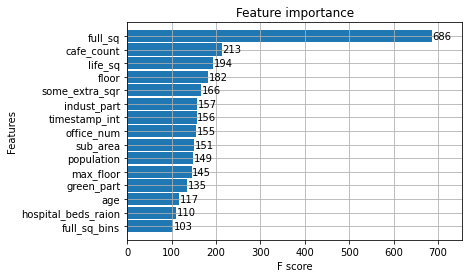

In [72]:
# посмотрим на важность фичей
# full_sq - самая важная, при этом падение в важности заметное
# можно подумать над исправлением данного момента
plot_importance(model_2,max_num_features=15, height=0.9)

In [73]:
# посмотрим на ошибки наших предсказаний

scores = pd.DataFrame(val_y)

In [74]:
scores['predicted'] = model.predict(xgb_test)

In [75]:
scores['error'] = scores.price - scores.predicted

In [77]:
scores.head(2)

price  predicted         error
2   5.826177e+06  8203364.5 -2.377188e+06
50  2.073190e+06  5415731.5 -3.342541e+06

In [78]:
scores['error'].describe()

count    1.425000e+03
mean     5.823264e+05
std      5.659960e+06
min     -6.540409e+07
25%     -1.754024e+06
50%      4.836944e+05
75%      2.733362e+06
max      5.282273e+07
Name: error, dtype: float64

In [ ]:
# зная примеры, на которых большие ошибки, можно пробовать тюнить модель